## 머신러닝

### 1번
온,습도,조도,CO2농도에 따른 객실의 사용유무 판별  
종속변수 Occupancy, 0: 비어있음 , 1: 사용중

In [78]:
import pandas as pd
import datetime as dt
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/23/problem1.csv')

df['date'] = df['date'].apply(lambda x : dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
df = df.set_index('date')
df

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-02 14:19:59,23.7180,26.2900,578.400000,760.40,0.004773,1
2015-02-02 14:22:00,23.7225,26.1250,493.750000,774.75,0.004744,1
2015-02-02 14:23:00,23.7540,26.2000,488.600000,779.00,0.004767,1
2015-02-02 14:23:59,23.7600,26.2600,568.666667,790.00,0.004779,1
2015-02-02 14:25:59,23.7540,26.2900,509.000000,797.00,0.004783,1
...,...,...,...,...,...,...
2015-02-18 09:08:59,20.7900,26.7675,10.000000,1455.00,0.004061,0
2015-02-18 09:10:00,20.7900,26.7450,50.750000,1463.75,0.004058,0
2015-02-18 09:15:00,20.8150,27.7175,429.750000,1505.25,0.004213,1


### 1-1 
데이터 EDA 수행 후, 분석가 입장에서 의미있는 탐색

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17910 entries, 2015-02-02 14:19:59 to 2015-02-18 09:19:00
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    17910 non-null  float64
 1   Humidity       17910 non-null  float64
 2   Light          17910 non-null  float64
 3   CO2            17889 non-null  float64
 4   HumidityRatio  17910 non-null  float64
 5   Occupancy      17910 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 979.5 KB


종속변수 Occupancy 이고 나머지는 독립변수이다.  
모든 독립변수가 수치형 변수임을 알 수 있다.  
종속변수 Occupancy 는 0, 1인 범주형 변수이므로 종속변수에 따른 독립변수의 분포를 살펴보자.

In [80]:
data = df.groupby('Occupancy').mean()
data

,Temperature,Humidity,Light,CO2,HumidityRatio
Occupancy,,,,,
0,20.584830,27.529654,24.877668,604.953846,0.004120
1,21.985277,28.037188,479.277401,969.270870,0.004585


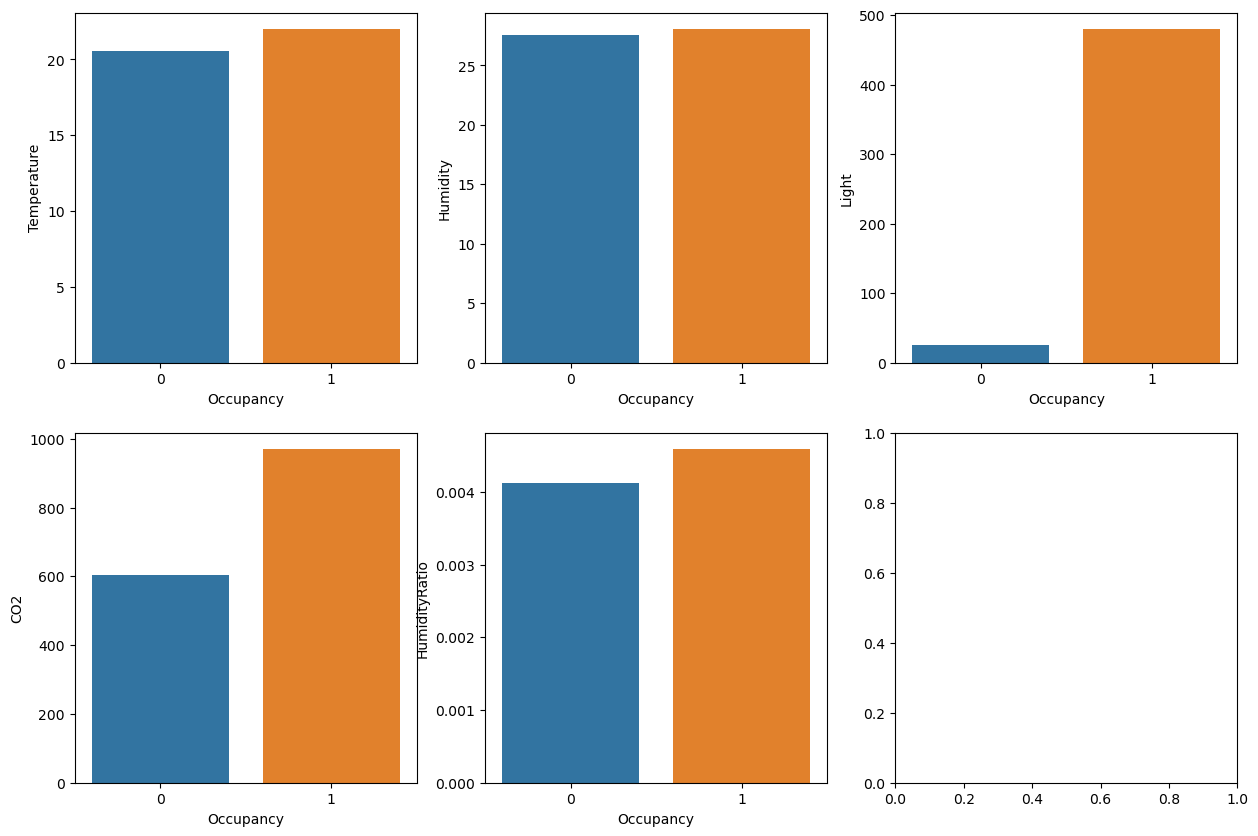

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(2,3, figsize = (15, 10))
for i in range(5):
    sns.barplot(x = data.index, y = data.iloc[:, i], ax = axes[i//3, i % 3])

시각화를 해석하면 다음과 같다.
+ 키온에 따라 방의 유무는 큰 차이가 없다.
+ 습도에 다라 방의 유무는 큰 차이가 없다.
+ 빈 방이 사용 중인 방에 비해 밝기가 훨씬 낮다. -> 너무 당연한 얘기이므로 큰 의미는 없어보인다.
+ 사용중인 방이 빈 방보다 이산화탄소 농도가 높다.
+ 사용중인 방이 빈 방보다 습도 비율이 조금 더 높다. 유의미하진 않아보인다.

이제 독립변수들 사이의 상관관계를 살펴보자.

<Axes: >

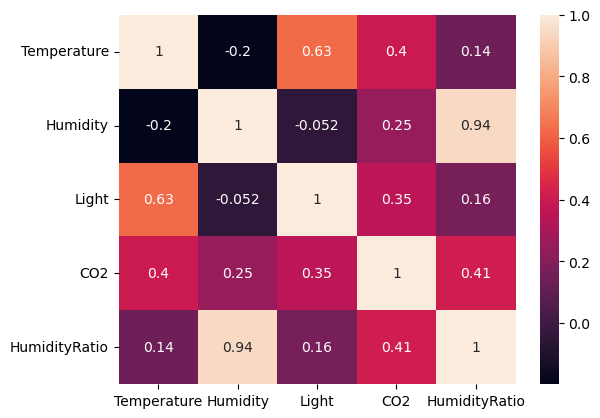

In [82]:
corr = df.drop(['Occupancy'], axis = 1).corr(method= 'pearson')
sns.heatmap(corr, annot= True,
            xticklabels=corr.columns,
            yticklabels=corr.columns)

독립변수 HumidityRatio 와 Humidity 가 아주 강한 상관관계를 보인다.

### 1-2 
결측치를 대체하는 방식 선택하고 근거제시, 대체 수행

In [83]:
df.isnull().sum() # CO2 변수에 결측치가 21개 존재한다.

Temperature       0
Humidity          0
Light             0
CO2              21
HumidityRatio     0
Occupancy         0
dtype: int64

In [84]:
df[df['CO2'].isna() == True] # 결측치가 연속적으로 존재한다.

# 결측치를 대체하는 방식으로는 단순확률대치, 대푯값 대치, KNN 알고리즘을 이용한 대치, 보간법 등이 있다.
# 시간의 흐름이 따라 변수가 영향을 받기 때문에 결측치를 대체하는 방법으로 보간법을 사용하겠다.

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-03 19:09:59,21.600000,28.500000,0.0,NaN,0.004548,0
2015-02-03 19:31:00,21.500000,28.050000,0.0,NaN,0.004448,0
2015-02-04 18:08:00,22.945000,27.290000,0.0,NaN,0.004728,0
2015-02-05 06:08:00,20.890000,23.290000,0.0,NaN,0.003553,0
2015-02-05 16:09:59,22.390000,26.840000,449.5,NaN,0.004494,1
2015-02-08 08:06:00,19.230000,31.100000,0.0,NaN,0.004286,0
2015-02-08 11:54:00,19.150000,30.890000,13.0,NaN,0.004235,0
2015-02-08 20:58:59,19.390000,27.390000,0.0,NaN,0.003809,0
2015-02-09 06:04:59,19.426667,26.666667,0.0,NaN,0.003717,0


In [85]:
df['CO2'] = df['CO2'].interpolate(method='nearest')

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17910 entries, 2015-02-02 14:19:59 to 2015-02-18 09:19:00
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    17910 non-null  float64
 1   Humidity       17910 non-null  float64
 2   Light          17910 non-null  float64
 3   CO2            17910 non-null  float64
 4   HumidityRatio  17910 non-null  float64
 5   Occupancy      17910 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 979.5 KB


### 1-3 
추가적으로 데이터의 질 및 품질관리를 향상시킬만한 내용 작성

<Axes: >

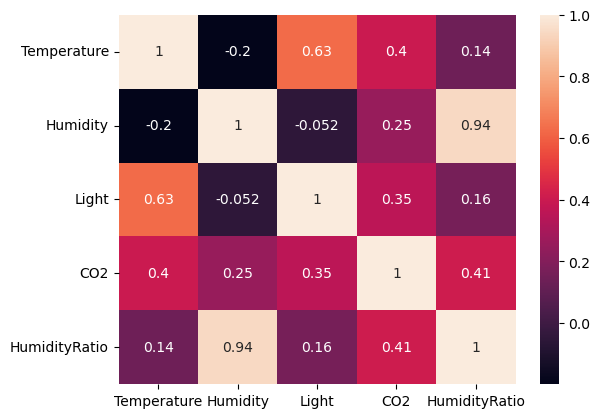

In [87]:
# 앞서 실시한 독립변수들간의 상관관계 히트맵을 살펴보자
corr = df.drop(['Occupancy'], axis = 1).corr(method= 'pearson')
sns.heatmap(corr, annot= True,
            xticklabels=corr.columns,
            yticklabels=corr.columns)

In [88]:
# HumiditRatio 와 Humidity 의 상관관계가 0.94로 아주 강한 상관관계를 나타낸다.
# 따라서 이 변수 중 하나를 제거하면 데이터의 질이 향상될 것이라고 판단된다.

In [96]:
df = df.drop(['HumidityRatio'], axis = 1)

### 2-1 
데이터에 불균형이 있는지 확인, 불균형 판단 근거 작성

In [97]:
df['Occupancy'].value_counts(normalize=True)

# 종속변수에 대해 클래스 불균형이 존재하는 지 확인해보았다.
# 0 의 비율이 88% 정도로 클래스 불균형이 존재한다고 판단할 수 있다.

Occupancy
0    0.882747
1    0.117253
Name: proportion, dtype: float64

### 2-2 
오버샘플링 방법들 중 2개 선택하고 장단점 등 선정 이유 제시

랜덤오버샘플링
+ 소수 클래스에 속하는 데이터의 관측치를 복사하는 방식으로 데이터를 증식한다.
+ 데이터를 단순 복사하는 방식이므로 기존의 데이터와 동일한 복제 데이터를 생성한다.
+ Random OverSampling 은 소수 클래스에 과적합이 발생할 가능성이 있다는 단점이 있지만, 사용방법이 간단하다는 장점이 있다.

SMOTE
+ 적은 데이터세트에 있는 개별 데이터들의 k-최근접 이웃을 찾아 해당 데이터와 k개 이웃들의 차이를 일정한 값으로 만들어 기존 데이터와 약간의 차이를 지닌 새로운 데이터를 생성하는 방식이다.
+ SMOTE 는 Resampling 방식보다 처리 속도가 느리다는 단점이 있지만, 데이터를 단순히 동일하게 증식시키는 방식이 아니기 떄문에 과적합 문제를 예방할 수 있다는 장점이 있다.

데이터의 크기가 크지 않고 과적합 문제를 예방할 수 있는 SMOTE 를 선택하겠다.

In [98]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

### 2-3 
오버샘플링 수행 및 결과, 잘 되었다는 것을 판단해라

In [99]:
X = df.drop(['Occupancy'], axis = 1)
y = df['Occupancy']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42, stratify=y)

print(y_train.value_counts())

sm = SMOTE(k_neighbors=3)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

print(y_train_sm.value_counts())

rand_over = RandomOverSampler()
X_train_over, y_train_over = rand_over.fit_resample(X_train, y_train)

print(y_train_over.value_counts())
# 클래스 불균형을 해결하였다.

Occupancy
0    11067
1     1470
Name: count, dtype: int64
Occupancy
0    11067
1    11067
Name: count, dtype: int64
Occupancy
0    11067
1    11067
Name: count, dtype: int64


### 3-1 
속도측면, 정확도측면 모델 1개씩 선택, 선택 이유도 기술

+ 속도 측면은 로지스틱회귀분석을 선택하겠다.
+ 정확도 측면 모델로 xgboost 선택하겠다.

선형모델인 로지스틱회귀분석이 속도가 빠를 것으로 예상되고, 정확도 측면으로는 학습할 떄 마다 잔차가 큰 데이터 포인트들의 가중치를 높여가며 모델을 생성하는 부스팅 방식이 정확도 측면에서 좋을 것으로 판단되어 선택하였다.

### 3-2 
위에서 오버샘플링 한 데이터 2개, 오버샘플링 하기 전 데이터 1개에 대해 모델 2개를 적용하고 성능 보여주기

In [101]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# LogisticRegression
log = LogisticRegression()
log.fit(X_train, y_train)
y_pred = log.predict(X_test)

log = LogisticRegression()
log.fit(X_train_over, y_train_over)
y_pred_over = log.predict(X_test)

log = LogisticRegression()
log.fit(X_train_sm, y_train_sm)
y_pred_sm = log.predict(X_test)

print('origin accuracy :', accuracy_score(y_test, y_pred))
print('randomoversampling accuracy :', accuracy_score(y_test, y_pred_over))
print('smote accuracy :', accuracy_score(y_test, y_pred_sm))

origin accuracy : 0.9862274334636144
randomoversampling accuracy : 0.9839940442955518
smote accuracy : 0.9843662758235623


In [105]:
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {'max_depth' : [3,4,5,6], 'learning_rate' : [0.01, 0.05, 0.1, 0.5]}

grid_xgb = GridSearchCV(XGBClassifier(), param_grid)
grid_xgb.fit(X_train, y_train)

grid_xgb.best_params_

{'learning_rate': 0.5, 'max_depth': 5}

In [107]:
xgb = XGBClassifier(learning_rate = 0.5, max_depth = 5)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

xgb = XGBClassifier(learning_rate = 0.5, max_depth = 5)
xgb.fit(X_train_over, y_train_over)
y_pred_over = xgb.predict(X_test)

xgb = XGBClassifier(learning_rate = 0.5, max_depth = 5)
xgb.fit(X_train_sm, y_train_sm)
y_pred_sm = xgb.predict(X_test)

print('origin accuracy :', accuracy_score(y_test, y_pred))
print('randomoversampling accuracy :', accuracy_score(y_test, y_pred_over))
print('smote accuracy :', accuracy_score(y_test, y_pred_sm))

origin accuracy : 0.9946026428438489
randomoversampling accuracy : 0.9940442955518333
smote accuracy : 0.9921831379117811


### 3-3 위 예측결과 사용해서 오버샘플링이 미친 영향에 대해 작성하라

로지스틱 회귀분석과 xgb 모델 모두 오버샘플링을 하기 전이 더 성능이 좋게 나왔다.  
하지만 큰 차이는 오버샘플링과 하기 전 데이터의 성능 차이가 크지 않으므로 오버샘플링이 효과가 나쁘다고 하기 어렵다.

## 통계분석

### 2번
공장에서는 진공관 수명이 1만 시간이라고 주장하여 품질관리팀에서 12개 샘플을 뽑았음 유의수준 5%에서 부호 검정하시오

### 2-1 귀무가설, 연구가설 세우기

In [109]:
import pandas as pd
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/23/problem2.csv')
df

# H0 : 진공관 수명이 1만 시간이다.
# H1 : 진공관 수명이 1만 시간이 아니다.

,name,life span
0,sample1,10000
1,sample2,9000
2,sample3,9500
3,sample4,10000
4,sample5,10000
5,sample6,8900
6,sample7,9900
7,sample8,10100
8,sample9,10300
9,sample10,10020


### 2-2 
유효한 데이터의 개수는?

In [114]:
df_filter = df[df['life span'] != 10000].reset_index(drop = True)
df_filter


,name,life span
0,sample2,9000
1,sample3,9500
2,sample6,8900
3,sample7,9900
4,sample8,10100
5,sample9,10300
6,sample10,10020
7,sample12,9800


### 2-3 
검정통계량 및 연구가설 채택 여부를 작성하라

In [117]:
from scipy.stats import wilcoxon

wilcoxon(df_filter['life span'] - 10000, alternative='two-sided')

# 귀무가설을 기각하지 모한다. 즉 중앙값은 10000과 차이가 없다.

WilcoxonResult(statistic=8.5, pvalue=0.1953125)

### 3번
코로나 시계열 데이터  
일자/국가명/확진자수

In [208]:
import pandas as pd
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/23/problem3_covid2.csv')
df

,location,date,new_cases
0,Austria,2021-01-01,2096.0
1,Austria,2021-01-02,1391.0
2,Austria,2021-01-03,1466.0
3,Austria,2021-01-04,1642.0
4,Austria,2021-01-05,2311.0
...,...,...,...
11890,Vanuatu,2021-10-28,0.0
11891,Vanuatu,2021-10-29,0.0
11892,Vanuatu,2021-10-30,0.0
11893,Vanuatu,2021-10-31,0.0


### 3-1
데이터는 일자별 각 나라의 일일 확진자수를 나타낸다. 각 나라의 일자별 누적확진자 수를 나타내는 데이터 프레임을 생성하라

In [209]:
df['누적확진자'] = df.groupby('location')['new_cases'].cumsum()
df = df.drop(['new_cases'], axis = 1)
df

,location,date,누적확진자
0,Austria,2021-01-01,2096.0
1,Austria,2021-01-02,3487.0
2,Austria,2021-01-03,4953.0
3,Austria,2021-01-04,6595.0
4,Austria,2021-01-05,8906.0
...,...,...,...
11890,Vanuatu,2021-10-28,5.0
11891,Vanuatu,2021-10-29,5.0
11892,Vanuatu,2021-10-30,5.0
11893,Vanuatu,2021-10-31,5.0


In [210]:
df[df.location == 'Palau'] 

,location,date,누적확진자
8845,Palau,2021-01-01,NaN
8846,Palau,2021-01-02,NaN
8847,Palau,2021-01-03,NaN
8848,Palau,2021-01-04,NaN
8849,Palau,2021-01-05,NaN
...,...,...,...
9145,Palau,2021-10-28,8.0
9146,Palau,2021-10-29,8.0
9147,Palau,2021-10-30,8.0
9148,Palau,2021-10-31,8.0


location 이 Palau 인 누적확진자가 0명일 때가 NaN으로 나와있으니 NaN을 0으로 표현하자.

In [211]:
df[df['누적확진자'].isna()]

,location,date,누적확진자
8845,Palau,2021-01-01,NaN
8846,Palau,2021-01-02,NaN
8847,Palau,2021-01-03,NaN
8848,Palau,2021-01-04,NaN
8849,Palau,2021-01-05,NaN
...,...,...,...
9073,Palau,2021-08-17,NaN
9074,Palau,2021-08-18,NaN
9075,Palau,2021-08-19,NaN
9076,Palau,2021-08-20,NaN


In [212]:
df.fillna(0, inplace = True)

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11895 entries, 0 to 11894
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   location  11895 non-null  object 
 1   date      11895 non-null  object 
 2   누적확진자     11895 non-null  float64
dtypes: float64(1), object(2)
memory usage: 278.9+ KB


### 3-2
1에서 구한 데이터를 각 나라별로 acf값을 구하고(lag는 50개까지 구하고 첫번째 값을 제외하라) 국가를 기준으로 유클리디안 거리를 기준으로 클러스터링을 진행 후 계층적 군집 분석을 위해 덴드로그램 작성하라

In [230]:
from statsmodels.tsa.stattools import acf
from scipy.cluster.hierarchy import linkage, dendrogram
name = []
for region in df['location'].unique():
    v = acf(df[df.location == region]['누적확진자'], fft = False, nlags = 50)
    name.append([region]+list(v[1:]))

v = pd.DataFrame(name)
v

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,Austria,0.986910,0.973895,0.961027,0.948347,0.935884,0.923563,0.911388,0.899286,0.887245,...,0.520420,0.509183,0.497960,0.486745,0.475543,0.464370,0.453267,0.442242,0.431334,0.420483
1,Bangladesh,0.993958,0.987757,0.981401,0.974895,0.968240,0.961439,0.954491,0.947394,0.940150,...,0.644404,0.633643,0.622824,0.611950,0.601019,0.590035,0.579005,0.567934,0.556820,0.545668
2,Bhutan,0.994586,0.989147,0.983590,0.977976,0.972226,0.966459,0.960636,0.954678,0.948797,...,0.700749,0.691193,0.681564,0.671847,0.662047,0.652165,0.642174,0.632091,0.621911,0.611642
3,Chile,0.992455,0.984846,0.977165,0.969415,0.961598,0.953711,0.945768,0.937768,0.929723,...,0.647890,0.638302,0.628672,0.618999,0.609285,0.599527,0.589710,0.579831,0.569911,0.559947
4,Colombia,0.993340,0.986596,0.979760,0.972838,0.965857,0.958820,0.951729,0.944587,0.937384,...,0.679471,0.670459,0.661382,0.652238,0.643029,0.633751,0.624406,0.615000,0.605532,0.596002
5,Costa Rica,0.991810,0.983535,0.975153,0.966751,0.958285,0.949791,0.941242,0.932571,0.923824,...,0.618037,0.608217,0.598396,0.588729,0.578986,0.569182,0.559436,0.549766,0.540130,0.530700
6,Dominica,0.985394,0.970488,0.955557,0.940502,0.925415,0.910434,0.894982,0.879564,0.864024,...,0.340212,0.325323,0.310219,0.295901,0.281439,0.266802,0.251947,0.237210,0.222798,0.210603
7,Dominican Republic,0.988748,0.977470,0.966112,0.954885,0.943612,0.932319,0.921053,0.909788,0.898637,...,0.590488,0.582152,0.573867,0.565637,0.557424,0.549236,0.541039,0.532845,0.524705,0.516596
8,Eswatini,0.991957,0.983655,0.975124,0.966366,0.957380,0.948162,0.938702,0.928984,0.919027,...,0.531118,0.517882,0.504646,0.491363,0.478050,0.464713,0.451352,0.438012,0.424679,0.411359
9,Ethiopia,0.990660,0.981181,0.971582,0.961856,0.952011,0.942059,0.931995,0.921820,0.911507,...,0.542607,0.530834,0.519123,0.507372,0.495701,0.484100,0.472584,0.461160,0.449834,0.438604


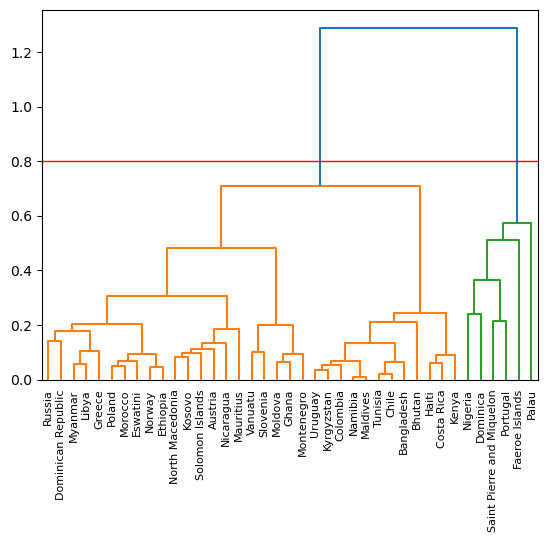

In [231]:
labellist = v.loc[:, 0].tolist()
single = linkage(v.iloc[:, 1:], method='average', metric='euclidean')
dendrogram(single,
           orientation = 'top',
           labels = labellist,
           distance_sort= 'descending',
           color_threshold=0.8, # 군집의 수를 설정하는 height 값 설정
           show_leaf_counts=True)
plt.axhline(y = 0.8, color = 'r', linewidth = 1) # height 값에 따라 선을 그어 적절한 군집 수 설정
plt.xticks(rotation = 90)

plt.show()

### 4번

아래 이미지와 같은 학과별 학점 분포 인원수 표가 있다. 학과와 성적이 관계있는지를 검정하라

In [232]:
data = {'score' : ['1.5~2.5', '2.5~3.5', '3.5~4.5'], '사회과학' : [15, 60, 24], '자연과학' : [25, 69, 5], '공학' : [10, 77, 13]}
data = pd.DataFrame(data).set_index('score')
data

,사회과학,자연과학,공학
score,,,
1.5~2.5,15,25,10
2.5~3.5,60,69,77
3.5~4.5,24,5,13


### 4-1
귀무가설, 연구가설 세우기

In [ ]:
# H0 : 학과와 성적이 독립이다. 
# H1 : 학과와 성적이 독립이 아니다.

### 4-2
학과와 성적이 독립일 경우의 기댓값을 구하시오

In [237]:
from scipy.stats import chi2_contingency

statistic, pvalue, df, expect = chi2_contingency(data)

pd.DataFrame(expect, columns = ['사회과학', '자연과학', '공학'], index = ['1.5~2.5', '2.5~3.5', '3.5~4.5'])

,사회과학,자연과학,공학
1.5~2.5,16.610738,16.610738,16.778523
2.5~3.5,68.436242,68.436242,69.127517
3.5~4.5,13.953020,13.953020,14.093960


### 4-3
검정통계량 구하고 연구가설의 채택여부 작성

In [239]:
print('검정통계량 :', statistic)
print('pvaleu :', pvalue)

# 귀무가설을 기각한다. 즉 독립이 아니다.

검정통계량 : 22.136920195949322
pvaleu : 0.00018822647762421383
